[View in Colaboratory](https://colab.research.google.com/github/sone444/sample/blob/master/GaAs_example.ipynb)

In [1]:
!pip install pymatgen

    100% |████████████████████████████████| 1.8MB 6.3MB/s 
    100% |████████████████████████████████| 645kB 8.0MB/s 
    100% |████████████████████████████████| 61kB 12.1MB/s 
    100% |████████████████████████████████| 31.2MB 1.4MB/s 
    100% |████████████████████████████████| 51kB 16.4MB/s 
    100% |████████████████████████████████| 675kB 19.1MB/s 
    100% |████████████████████████████████| 81kB 21.4MB/s 
  Running setup.py bdist_wheel for pymatgen ... - \ | / - \ | / - \

 | / - \ done
  Stored in directory: /content/.cache/pip/wheels/e3/85/5b/61b47a81f7578791e470f75f3d42005511f108a790f2cead6e
  Running setup.py bdist_wheel for pydispatcher ... - done
  Stored in directory: /content/.cache/pip/wheels/88/99/96/cfef6665f9cb1522ee6757ae5955feedf2fe25f1737f91fa7f
  Running setup.py bdist_wheel for tabulate ... - done
  Stored in directory: /content/.cache/pip/wheels/2a/85/33/2f6da85d5f10614cbe5a625eab3b3aebfdf43e7b857f25f829
  Running setup.py bdist_wheel for spglib ... - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /content/.cache/pip/wheels/e0/71/77/7eef3538979555a1d25cb01a965dc3342c55a4af52a6e9bc61
Successfully built pymatgen pydispatcher tabulate spglib
  Found existing installation: scipy 0.19.1
    Uninstalling scipy-0.19.1:
      Successfully uninstalled scipy-0.19.1


##Pynatgenのインストール
[Pymatgen](http://pymatgen.org/)

- vasprun.xmlからの可視化が可能
- cifとoutputの互換性


In [2]:
!pip -U -q PyDrive


Usage:   
  pip3 <command> [options]

no such option: -U


In [0]:
!pip install -U -q PyDrive

In [5]:
from google.colab import files
uploaded = files.upload()

###Google drive からの読み込み


In [6]:
!ls

datalab


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
id  =  '1jnkkHb2fyZIVshJ3dzqa_2BxvqEduPIa'   # 共有リンクで取得した id= より後の部分
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('vasprun.xml')

In [11]:
!ls

datalab  vasprun.xml


In [0]:
from pymatgen.io.vasp import Vasprun
from pymatgen.electronic_structure.plotter import DosPlotter

/usr/local/lib/python3.6/dist-packages/pymatgen/io/vasp/outputs.py:877: UserWarning: No POTCAR file with matching TITEL fields was found in /content
  " was found in {}".format(os.path.abspath(p)))


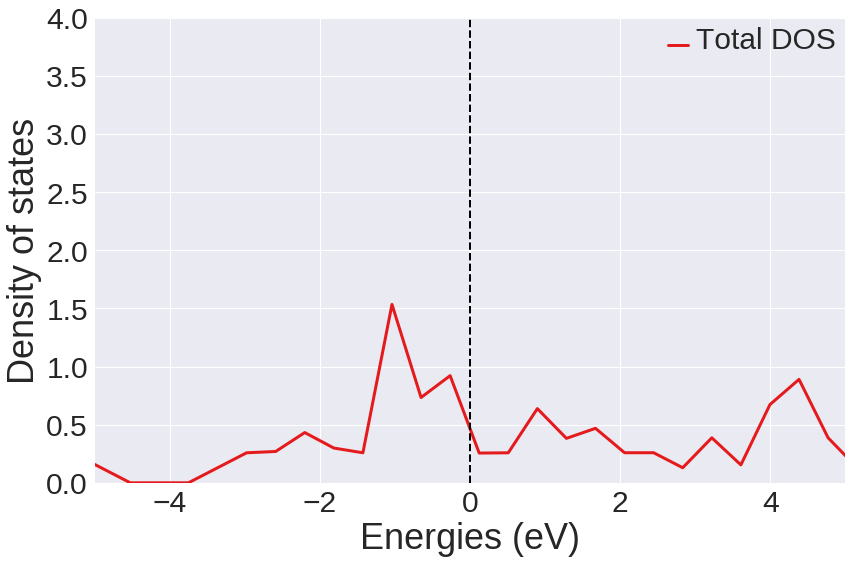

In [20]:
v = Vasprun('vasprun.xml')
tdos = v.tdos
plotter = DosPlotter()
plotter.add_dos("Total DOS", tdos)
plotter.show(xlim=[-5, 5], ylim=[0, 4])

/usr/local/lib/python3.6/dist-packages/pymatgen/io/vasp/outputs.py:877: UserWarning: No POTCAR file with matching TITEL fields was found in /content
  " was found in {}".format(os.path.abspath(p)))


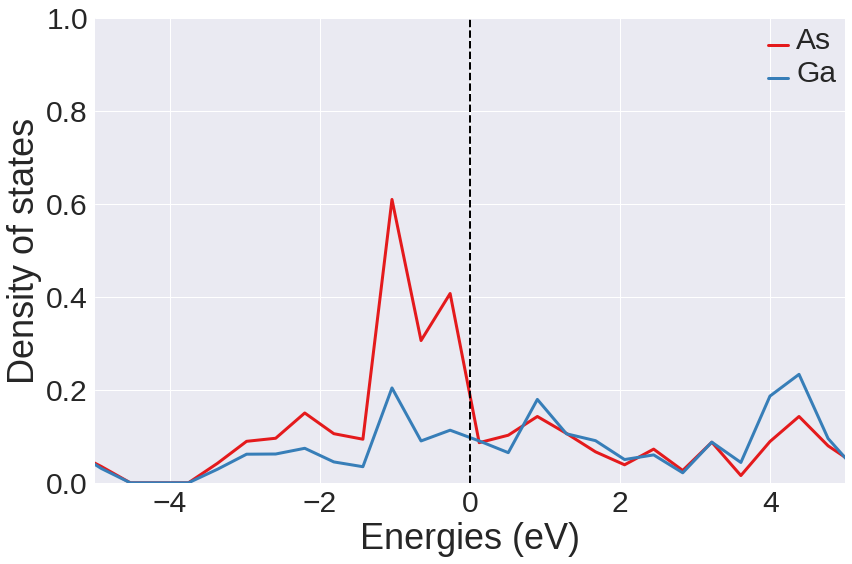

In [21]:
v = Vasprun('vasprun.xml')
cdos = v.complete_dos
element_dos = cdos.get_element_dos()
plotter = DosPlotter()
plotter.add_dos_dict(element_dos)
plotter.show(xlim=[-5, 5], ylim=[0, 1])

In [23]:
from pymatgen.io.vasp import Vasprun, BSVasprun
from pymatgen.electronic_structure.plotter import BSPlotter
v = BSVasprun("vasprun.xml")
bs = v.get_band_structure(kpoints_filename="Si-band/KPOINTS",line_mode=True)
plt = BSPlotter(bs)
plt.get_plot(vbm_cbm_marker=True,ylim=(-3,3))
plt.show()

VaspParserError: ignored

In [0]:
bs = v.get_band_structure()

In [25]:
bs.get_band_gap()

{'direct': True,
 'energy': 0.1743999999999999,
 'transition': '(0.000,0.000,0.000)-(0.000,0.000,0.000)'}

In [0]:
import matplotlib as plt

In [29]:
from pymatgen.io.vasp import Vasprun
from pymatgen.electronic_structure.plotter import BSPlotter
v = BSVasprun("vasprun.xml")
bandstr = v.get_band_structure(line_mode=True)
plt = BSPlotter(bandstr).get_plot(ylim=[-12,10])
plt.savefig("band.pdf")

VaspParserError: ignored

##InSb（去年の）

In [40]:
from google.colab import files
uploaded = files.upload()

Saving vasprun2.xml to vasprun2.xml


In [41]:
!ls

datalab  vasprun (2).xml  vasprun(2).xml  vasprun2.xml	vasprun.xml


In [0]:
id  =  '1jnkkHb2fyZIVshJ3dzqa_2BxvqEduPIa'   # 共有リンクで取得した id= より後の部分
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('vasprun(2).xml')

In [0]:
from pymatgen.io.vasp import Vasprun
from pymatgen.electronic_structure.plotter import DosPlotter

/usr/local/lib/python3.6/dist-packages/pymatgen/io/vasp/outputs.py:877: UserWarning: No POTCAR file with matching TITEL fields was found in /content
  " was found in {}".format(os.path.abspath(p)))


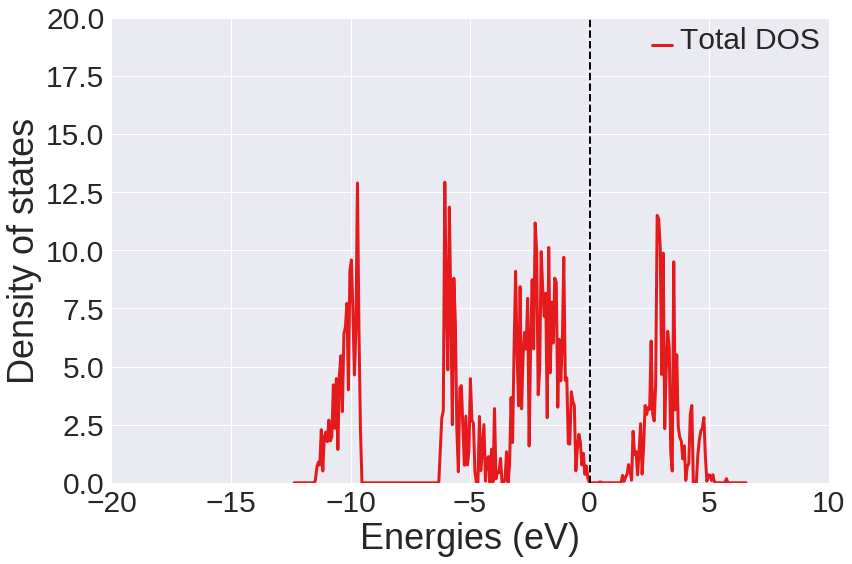

In [45]:
v = Vasprun('vasprun2.xml')
tdos = v.tdos
plotter = DosPlotter()
plotter.add_dos("Total DOS", tdos)
plotter.show(xlim=[-20, 10], ylim=[0, 20])